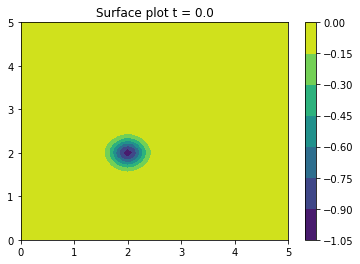

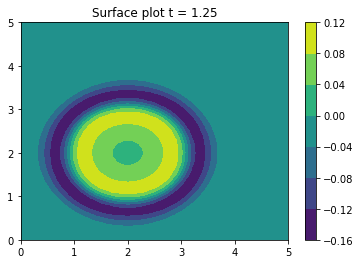

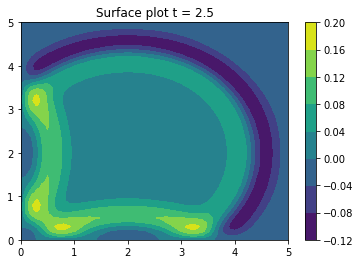

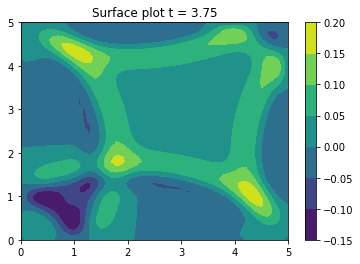

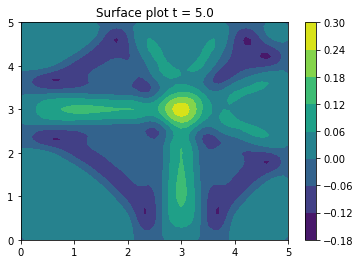

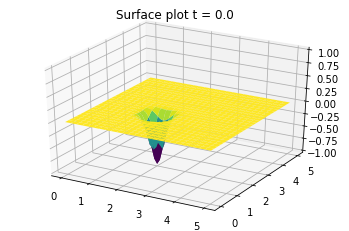

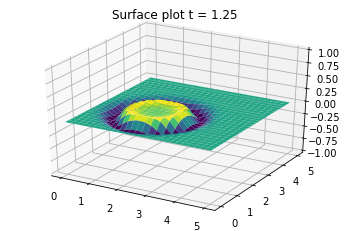

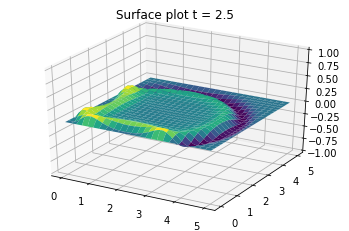

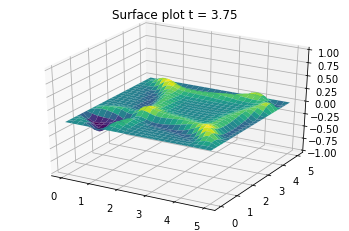

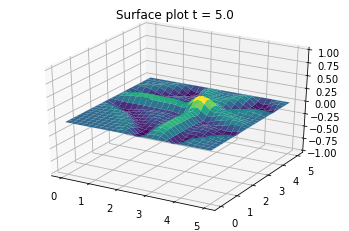

CW done: I deserve a good mark


In [1]:
# In this section I am importing all the libraries I will need

import numpy as np
import matplotlib.pyplot as pl
import math as m
from mpl_toolkits import mplot3d
import sys

# In this section I am setting the domain of solution and the discretised grid

#set domain
xa = 0
xb = 5
ya = 0
yb = 5
ta = 0
tb = 5

#set increments
dx = 0.1
dy = 0.1
dt = 0.05

#set wave speed
c2 = 1

#calculate sx, sy
sx = c2 * ((dt)**2) / ((dx)**2)
sy = c2 * ((dt)**2) / ((dy)**2)

#exit if not convergent
if not (((dt)**2) / ((dx)**2) < c2)and(((dt)**2) / ((dy)**2) < c2):
    sys.exit("Not convergent")

# In this section I am defining arrays I need
# define arrays and lengths
x = np.arange(xa,xb+dx,dx)
Nx = len(x)
y = np.arange(ya,yb+dy,dy)
Ny = len(y)
t = np.arange(ta,tb+dt,dt)
Nt = len(t)


#define solution matrix
W = np.ndarray((Nt,Nx,Ny))

#set meshgrid
Yg, Xg = np.meshgrid(y,x)

# In this section I am setting the boundary conditions/initial values

# Initial value is a narrow gaussian peak at [2,2] with no initial velocity
Wi = 0.1; #width of the peak
f = lambda x,y: -1*m.exp(-(np.square(x-2)/Wi+np.square(y-2)/Wi))  # the function f(x,y) at t=0
g = lambda x,y: 0 # the derivative of the function at t=0: f'(x,y) = g(x,y)

for i in range(0,Nx):
    for j in range(0,Ny):
        W[0,i,j] = f(x[i],y[j])

#Apply Boundary conditions: set the value at walls at all timesteps to zero (fixed end condition)
W[:,0,:] = 0
W[:,-1,:] = 0
W[:,:,0] = 0
W[:,:,-1] = 0

# In this section I am implementing the numerical method
# first use the unique method for k = 1
for i in range(1,Nx-1): 
    for j in range(1,Ny-1):
        W[1,i,j] = (W[0,i,j]*(1-sx-sy)) + (dt*g(x[i],y[j])) + (sx/2) * (W[0,i+1,j] + W[0,i-1,j]) + (sy/2) * (W[0,i,j+1] + W[0,i,j-1])

# now for all other timesteps
for k in range(1,Nt-1):
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):        
            W[k+1,i,j] = (2 * W[k,i,j]*(1-sx-sy)) - W[k-1,i,j] + (sx * (W[k,i+1,j] + W[k,i-1,j])) + (sy *(W[k,i,j+1] + W[k,i,j-1]))

# In this section I am showing the results
# Plot At several intervals
plots = 4
#2d Color-bar plot
if 1:
    tPlot = 0
    while tPlot<=Nt:
        pl.contourf(Xg,Yg,W[tPlot,:,:])
        pl.colorbar()
        pl.title('Surface plot t = ' + str(tPlot*dt))
        tPlot += Nt/plots   #set time intervals of plots
        tPlot = round(tPlot)
        pl.show()
        
#3d Surface plot
if 1:
    tPlot = 0
    while tPlot<=Nt:
        fig = pl.figure()
        ax = pl.axes(projection='3d')
        ax.set_zlim(-1,1)   #setting constant scale
        ax.plot_surface(Xg,Yg,W[tPlot,:,:],cmap='viridis', edgecolor='none')
        #ax.plot_wireframe(Xg,Yg,W[tPlot,:,:],color='black')
        ax.set_title('Surface plot t = ' + str(tPlot*dt))
        tPlot += Nt/plots   #set time intervals of plots
        tPlot = round(tPlot)
        pl.show()
    
# In this section I am celebrating
print('CW done: I deserve a good mark')


# In[105]:





# In[ ]:




